there are multiple ways of performing data augmentation for images. But in the satellite images we shouldn't change the coordinates of the buildings in the images. So i'm trying out with following methods
1. color jittering
2. gaussian noise addition
3. blur and sharpen
4. histogram equilization
5. gamma correction
6. elastic transform
7. channel shuffling
8. cutout

In [ ]:
#image_path="C:\\Users\\PC\\Desktop\\disaster_management_project\\train_images_labels_targets\\train\\images\\guatemala-volcano_00000000_post_disaster.png"

In [11]:
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
image_path = "C:\\Users\\PC\\Desktop\\disaster_management_project\\train_images_labels_targets\\train\\images\\guatemala-volcano_00000000_post_disaster.png"
image=Image.open(image_path) 
image_dir="C:\\Users\\PC\\Desktop\\disaster_management_project"

guatemala-volcano_00000000_post_disaster.png


(-0.5, 1023.5, 1023.5, -0.5)

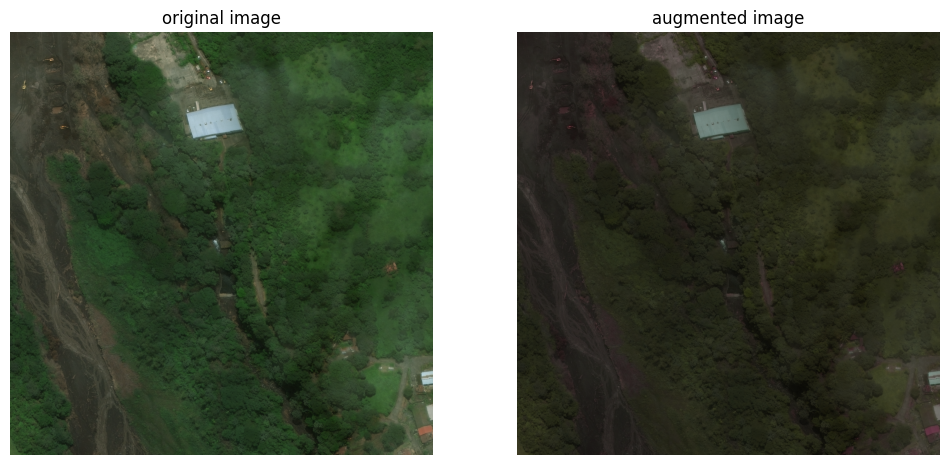

In [20]:
# color jittering
# this method randomly changes the saturation, hue, brightness and contrast of the image

#load_image
import os
color_jitter=transforms.ColorJitter(brightness=0.5,hue=0.5,saturation=0.5,contrast=0.5)
aug_image = color_jitter(image)
name=os.path.basename(image_path)
print(name)
image_name=name[:-4]+'_clr_jtr_aug'+'.png'

#test_name=os.path.realpath(os.fspath(image_path))
#print(test_name)
#aug_image.save(f'{name}.png',format="PNG")
file_name=os.path.join(image_dir,image_name)
aug_image.save(file_name,format='PNG')

#def display_images(original_image, transformed_image, titles=['Original Image', 'Transformed Image']):

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(image)
axes[0].set_title('original image')
axes[0].axis('off')

# Transformed image
axes[1].imshow(aug_image)
axes[1].set_title('augmented image')
axes[1].axis('off')

    #plt.show()
#display(image,aug_image)

                             

In [22]:
def color_jittering(image_path,images_dir):
    
    image = Image.open(image_path)
    color_jitter=transforms.ColorJitter(brightness=0.5,hue=0.5,saturation=0.5,contrast=0.5)
    aug_image = color_jitter(image)
    name=os.path.basename(image_path)
    image_name=name[:-4]+'_clr_jtr_aug'+'.png'
    file_name=os.path.join(images_dir,image_name)
    aug_image.save(file_name,format='PNG')
  



#     for image_name in os.listdir(images_dir):
#         if image_name.endswith(".png") and "_pre" in image_name:
#         image_path=os.path.join(images_dir,image_name)
color_jittering(image_path,image_dir)

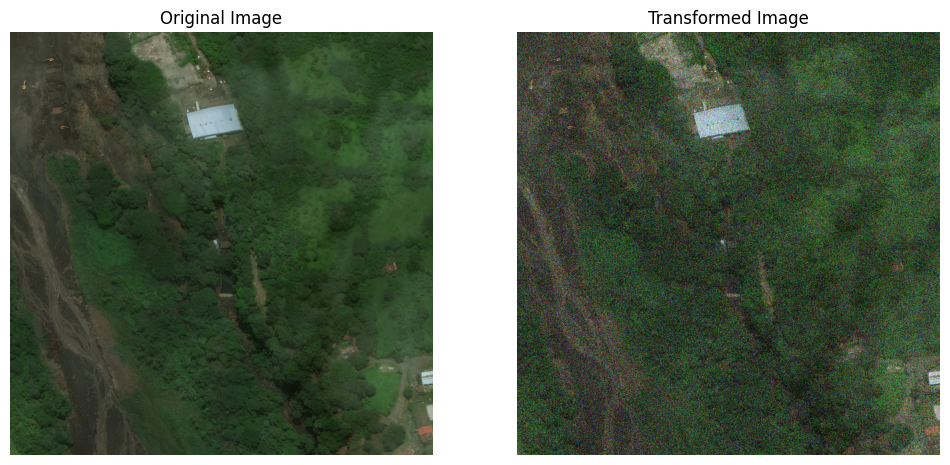

In [2]:
# adding gaussian noise
#by taking some random value and adding those points to the image makes the image noisy. This helps to make the model robust

def gaussian_noise(image,mean=0,std=50):
    #generate a numpy array
    image_array=np.array(image)
    #generate noise 
    noise = np.random.normal(mean,std,image_array.shape)
    #add noise to the image
    noisy_image = image_array + noise  # this may contain values greater than 255. So, we need to clip it off to 255
    #clipping the values to be in valid range
    clipped_image = np.clip(noisy_image,0,255).astype('uint8')
    
    return Image.fromarray(clipped_image)
def display_images(original_image, transformed_image, titles=['Original Image', 'Transformed Image']):
    """
    Display the original and transformed images side by side.
    
    Args:
        original_image (PIL.Image): The original image.
        transformed_image (PIL.Image): The transformed image.
        titles (list): Titles for the subplots.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    axes[0].imshow(original_image)
    axes[0].set_title(titles[0])
    axes[0].axis('off')

    # Transformed image
    axes[1].imshow(transformed_image)
    axes[1].set_title(titles[1])
    axes[1].axis('off')

    plt.show()
    
noisy_image = gaussian_noise(image)
display_images(image,noisy_image)

In [ ]:
# applying gaussian blur and sharpening

In [59]:
pip install opencv-python



     --------------------------------------- 38.8/38.8 MB 19.2 MB/s eta 0:00:00


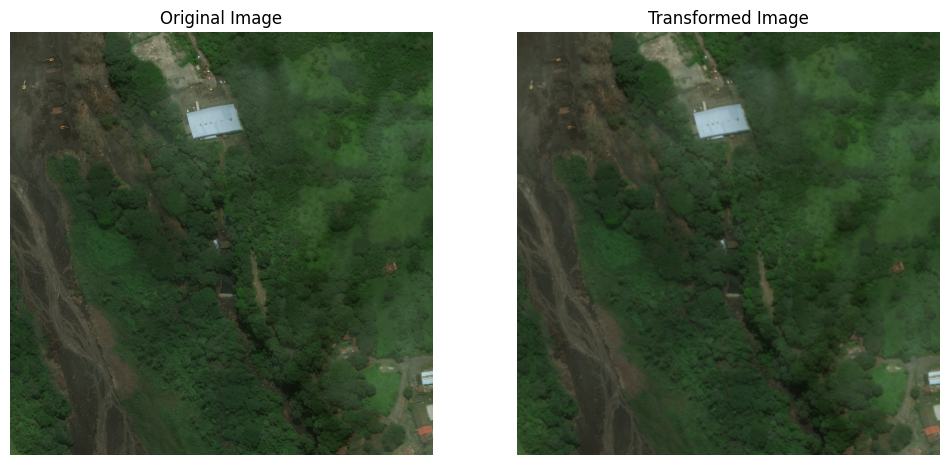

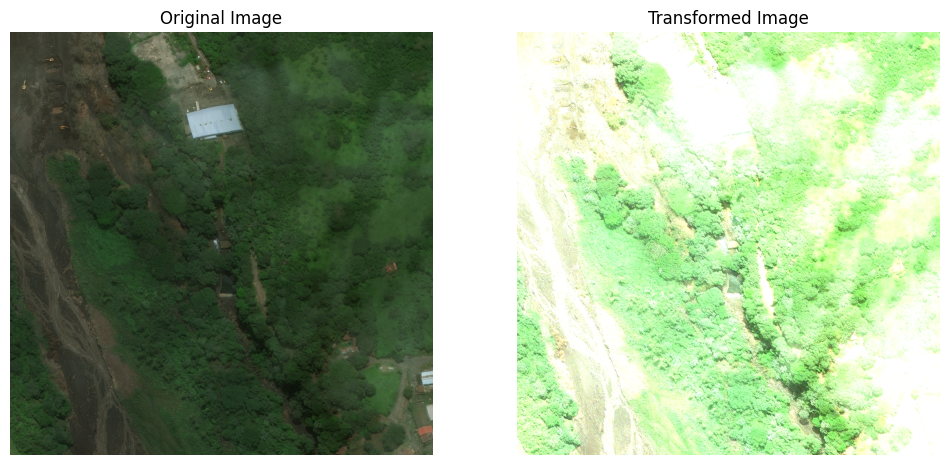

In [3]:
import cv2
def apply_blur_cv(image_array, kernel_size=5):
    
    return cv2.GaussianBlur(image_array, (kernel_size, kernel_size), 0)
def apply_sharpen_cv(image_array):
    
    kernel = np.array([[1, -1, 0],
                       [-1, 7,-1],
                       [0, -1, 1]])
    return cv2.filter2D(image_array, -1, kernel)
image_array=np.array(image)
blur_image=apply_blur_cv(image_array)
shape_image = apply_sharpen_cv(image_array)
display_images(image,blur_image)
display_images(image,shape_image)

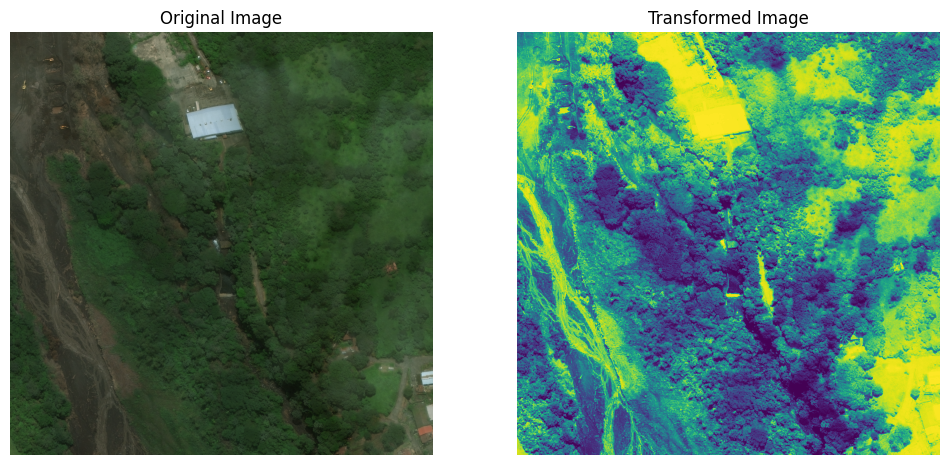

In [73]:
# histogram images

def histogram_equalization(image):
    
    # Convert to grayscale if the image is colored
    if len(image.shape) == 3 and image.shape[2] == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image
    
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image_gray)
    
    return equalized_image

image_cv=cv2.imread(image_path)
histogram = histogram_equalization(image_cv)
display_images(image,histogram)


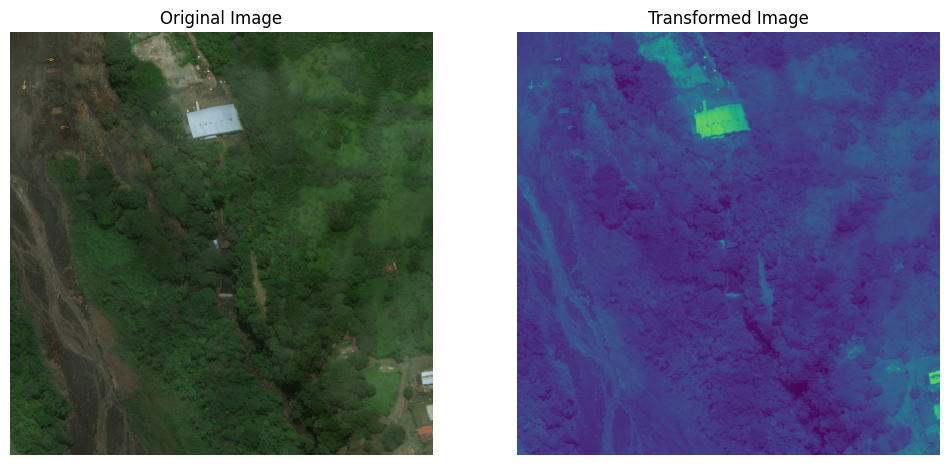

In [75]:
#elastic transform

from scipy.ndimage import gaussian_filter, map_coordinates

def elastic_transform(image, alpha, sigma, random_state=None):
    
    if random_state is None:
        random_state = np.random.RandomState(None)
    
    shape = image.shape
    
    # Generate random displacement fields
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    
    # Create meshgrid
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1))
    
    # Map coordinates and apply the transformation
    distorted_image = map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)
    
    return distorted_image


image_cv = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply elastic transform
alpha = 34  # Scaling factor for the deformation
sigma = 4  # Standard deviation for the Gaussian filter
transformed_image_cv = elastic_transform(image_cv, alpha, sigma)
display_images(image,transformed_image_cv)

# fusion augmentation

implementing the examples explained in the paper DATA AUGMENTATION APPROACHES FOR SATELLITE IMAGE

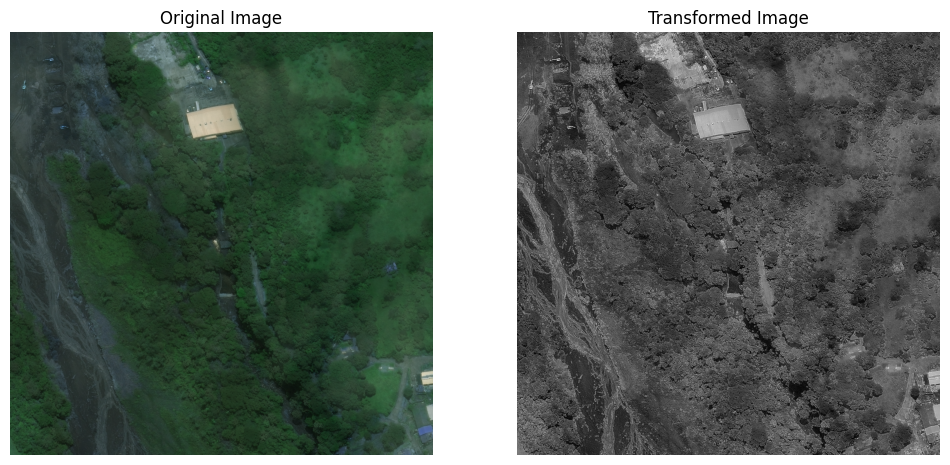

(1024, 1024)


In [32]:
# in this method we use 3 fusion methods
#    1. contrast enchancement
#    2. edge detection
#    3. unsharp masking
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def contrast_enhancement(image):
    # we are using histogram equalization
    clahe_image = cv.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    return clahe_image.apply(image)


def edge_detection(image):
    # for edge detection there are 3 important methods
    #1. sobel edge detection
    # 2.gradient edge detection
    # 3. Touzi edge detection
    low_threshold=100
    high_threshold=200
    canny_edges = cv.Canny(image,low_threshold,high_threshold)
    return canny_edges
    
    

def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(strength + 1) * image - float(strength) * blurred
    sharpened = np.maximum(sharpened, 0)
    sharpened = np.minimum(sharpened, 255)
    sharpened = sharpened.round().astype(np.uint8)
    return sharpened


def image_augmentation(image):
    enhanced_image = contrast_enhancement(image)
    edge_detected_image = edge_detection(enhanced_image)
    sharpend_image = unsharp_mask(enhanced_image)
    final_image = cv2.addWeighted(sharpend_image, 0.8, edge_detected_image, 0.2, 0)
    return final_image


def display_images(original_image, transformed_image, titles=['Original Image', 'Transformed Image']):
    """
    Display the original and transformed images side by side.
    
    Args:
        original_image (PIL.Image): The original image.
        transformed_image (PIL.Image): The transformed image.
        titles (list): Titles for the subplots.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    axes[0].imshow(original_image)
    axes[0].set_title(titles[0])
    axes[0].axis('off')

    # Transformed image
    axes[1].imshow(transformed_image,cmap='gray')
    axes[1].set_title(titles[1])
    axes[1].axis('off')

    plt.show()
    



image_path= "C:\\Users\\PC\\Desktop\\disaster_management_project\\train_images_labels_targets\\train\\images\\guatemala-volcano_00000000_post_disaster.png"
image = cv.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
final_image=image_augmentation(gray_image)
#cv.imwrite('final_image.png',final_image)
display_images(image,final_image)  
print(final_image.shape)


# till now we have applied the transformations for a single channel, but we need it for the 3 channels(RGB) to train the model.

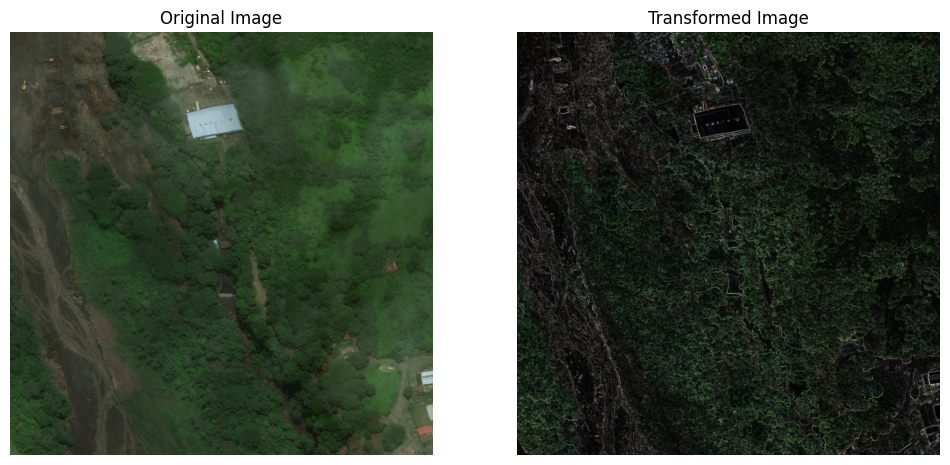

(1024, 1024, 3)


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_enhancement(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(strength + 1) * image - float(strength) * blurred
    sharpened = np.maximum(sharpened, 0)
    sharpened = np.minimum(sharpened, 255)
    sharpened = sharpened.round().astype(np.uint8)
    return sharpened

def sobel_edge_detection(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # x direction
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # y direction
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)
    return magnitude

def image_augmentation_rgb(image):
    # Split the image into R, G, B channels
    channels = cv2.split(image)
    
    # Apply contrast enhancement, unsharp masking, and Sobel edge detection to each channel
    augmented_channels = []
    for channel in channels:
        enhanced_channel = contrast_enhancement(channel)
        unsharp_image = unsharp_mask(enhanced_channel)
        edge_image = sobel_edge_detection(unsharp_image)
        augmented_channels.append(edge_image)
    
    # Merge the augmented channels back into an RGB image
    augmented_image = cv2.merge(augmented_channels)
    return augmented_image

def display_images(original_image, transformed_image, titles=('Original Image', 'Transformed Image')):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Original image
    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title(titles[0])
    axes[0].axis('off')
    
    # Transformed image
    axes[1].imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title(titles[1])
    axes[1].axis('off')
    
    plt.show()

# Load the image
image = cv2.imread(image_path)

# Apply image augmentation
final_image = image_augmentation_rgb(image)

# Display the original and transformed images
display_images(image, final_image)
image_name = 'final_image.png'
new_name = image_name[:-4]+'_aug'+'.png'
cv.imwrite(new_name,final_image)
print(final_image.shape)
